In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from hmmlearn.hmm import MultinomialHMM
from hmmlearn.hmm import _BaseHMM
from hmmlearn import hmm
import math

states = ('High_Up', 'Low_Up', 'Low_Down', 'High_Down')

observation = (ref_cycle_up, ref_cycle_same, ref_cycle_down)

In [2]:
x = pd.read_csv('test1.csv')

In [3]:
x = np.atleast_2d(x.values)

In [4]:
x

array([[1],
       [1],
       [1],
       ...,
       [0],
       [3],
       [3]])

In [5]:
#model = GaussianHMM(n_components=4, verbose="True", n_iter=1000)
model = MultinomialHMM(n_components=4, verbose="True", n_iter=1000)

In [6]:
model.startprob_ = np.array([0.5, 0.5, 0, 0])

In [7]:
model.transmat_ = np.array([
 [0,0.002, 0.034, 0.964],
 [0.687, 0.161, 0.094, 0.058],
 [0.738, 0.156, 0.106, 0],
 [0, 0.687, 0.309, 0.004]
])

In [8]:
model.emissionprob_ = np.array([
    [1.   , 0.   , 0.   ],
    [0.673, 0.082, 0.245],
    [0.078, 0.06 , 0.862],
    [0.002, 0.   , 0.998]
])

In [9]:
#model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000, init_params="cm", verbose="True")

In [10]:
#model.startprob_ = np.array([0.5, 0.5, 0.0, 0.0])

In [11]:
#model.transmat_

In [13]:
model.fit(x)

         1       -2130.3608             +nan
         2       -2020.4350        +109.9259
         3       -1900.3114        +120.1236
         4       -1547.0086        +353.3028
         5       -1063.1251        +483.8835
         6        -871.3158        +191.8093
         7        -825.6445         +45.6713
         8        -813.2419         +12.4026
         9        -808.7486          +4.4933
        10        -807.0583          +1.6903
        11        -806.2956          +0.7627
        12        -805.7569          +0.5387
        13        -805.1988          +0.5581
        14        -804.5235          +0.6753
        15        -803.6768          +0.8467
        16        -802.5781          +1.0987
        17        -801.0648          +1.5133
        18        -798.8927          +2.1722
        19        -795.8588          +3.0339
        20        -792.0816          +3.7772
        21        -788.1237          +3.9579
        22        -784.6294          +3.4943
        23

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=4,
               n_iter=1000, params='ste',
               random_state=RandomState(MT19937) at 0x10F19ED10,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose='True')

In [14]:
hidden_states = model.predict(x)

In [15]:
for i in range(model.n_components):
    print('\nHidden state', i+1)
    #print('Mean =', round(model.means_[i][0], 3))
    #print('variance =', round(np.diag(model.covars_[i])[0], 3))


Hidden state 1

Hidden state 2

Hidden state 3

Hidden state 4


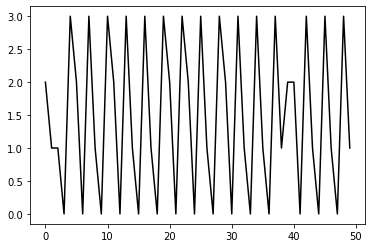

In [16]:
# Generate data using model
num_samples = 50
samples, _ = model.sample(num_samples)
plt.plot(np.arange(num_samples), samples[:,0], c='black')
#plt.title('Number of components = ' + str(num_components))
plt.show()

In [17]:
model.score(x)

-735.4415799666699

In [18]:
model.score_samples(x)

(-735.4415799666699, array([[0.00000000e+000, 1.00000000e+000, 1.78105161e-056,
         3.37701630e-037],
        [5.03915811e-043, 9.99907461e-001, 1.10605287e-040,
         9.25388344e-005],
        [1.65690164e-065, 1.90013113e-019, 2.35127343e-011,
         1.00000000e+000],
        ...,
        [1.97283338e-105, 1.05061957e-030, 1.00000000e+000,
         2.59807852e-023],
        [9.99367463e-001, 6.32537218e-004, 5.21467942e-120,
         4.63905073e-033],
        [9.91545498e-001, 8.43691542e-003, 2.84739668e-133,
         1.75866959e-005]]))

In [19]:
math.exp(model.score(x))

3.9975e-320

In [20]:
logprob, seq = model.decode(np.array([[0, 0, 0, 3, 2, 1, 2, 2]]).transpose())
print(math.exp(logprob))
print(seq)

4.552185539810664e-54
[1 3 2 0 3 1 1 1]


In [21]:
logprob

-122.82398756562125

In [22]:
model.startprob_.round(3)

array([0., 1., 0., 0.])

In [23]:
model.transmat_.round(3)

array([[0.004, 0.001, 0.   , 0.995],
       [0.   , 0.679, 0.   , 0.321],
       [0.996, 0.004, 0.   , 0.   ],
       [0.   , 0.06 , 0.94 , 0.   ]])

In [24]:
model.monitor_

ConvergenceMonitor(
    history=[-735.4563488201475, -735.4480604906615],
    iter=38,
    n_iter=1000,
    tol=0.01,
    verbose=True,
)

In [25]:
z = model.predict(x)

In [26]:
np.savetxt("asdf.csv",z, delimiter=',')

In [27]:
k = pd.read_csv("asdf.csv")

In [28]:
k

,1.000000000000000000e+00
0,1.0
1,3.0
2,2.0
3,0.0
4,3.0
...,...
1531,1.0
1532,3.0
1533,2.0
1534,0.0


In [29]:
k = np.atleast_2d(k.values)

In [30]:
k

array([[1.],
       [3.],
       [2.],
       ...,
       [2.],
       [0.],
       [0.]])

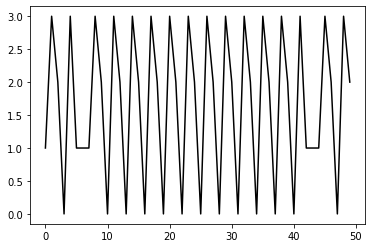

In [31]:
num_samples = 50
#samples, _ = model.sample(num_samples)
plt.plot(np.arange(num_samples), k[:50,0], c='black')
#plt.title('Number of components = ' + str(num_components))
plt.show()